GPU is available
{'NPD': 0, 'PD': 1}


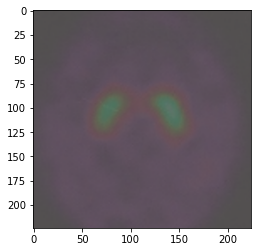

In [44]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
import os, time, copy, itertools
from torch.optim import lr_scheduler
from sklearn.metrics import f1_score
from torchvision.utils import save_image
from sklearn.metrics import confusion_matrix
from matplotlib.backends.backend_pdf import PdfPages
from torchvision import models, datasets, transforms
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler, ConcatDataset
print("GPU is", "available" if torch.cuda.is_available() else "NOT AVAILABLE")
data_dir = r'/media/kv/Documents/git/mtkvcs-custom-cnn/dataset/datscan/train/'
dst_dir = r'/media/kv/Documents/git/mtkvcs-custom-cnn/dataset/datscan/train2/'
img_num = 0


augmented_dataset = datasets.ImageFolder(data_dir)
classes = augmented_dataset.class_to_idx
print(classes)
class_keys = list(classes.keys())

augmented_dataset.transform= transforms.Compose([
transforms.Resize(224),             # resize shortest side to 224 pixels
transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
 transforms.ColorJitter(contrast=1, saturation=0.5, hue=0.5),
transforms.RandomHorizontalFlip(p=0.5),
transforms.ToTensor()
])
img, label = augmented_dataset[50]
img = np.transpose(img,[1,2,0])
plt.imshow(img)
plt.show()

In [47]:
for _ in tqdm(range(10)):

    augmented_dataset.transform= transforms.Compose([
    transforms.Resize(224),             # resize shortest side to 224 pixels
    transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
    transforms.ColorJitter(contrast=1, saturation=0.5, hue=0.5),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
    ])

    for img, label in augmented_dataset:
        if label == 0:
            save_image(img, dst_dir + class_keys[label] + '/aug_' + class_keys[label]+str(img_num)+'.png')
        elif label == 1:
            save_image(img, dst_dir + class_keys[label] + '/aug_' + class_keys[label]+str(img_num)+'.png')
        img_num+=1

100%|██████████| 10/10 [01:48<00:00, 10.86s/it]


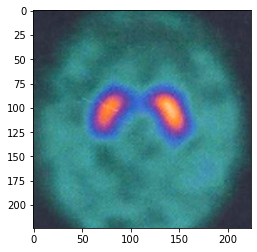

In [19]:
img, label = augmented_dataset[50]
img = np.transpose(img,[1,2,0])
plt.imshow(img)
plt.show()